In [ ]:
import numpy as np
import save_restore_images
import visualize_data
from tensorpack.dataflow.dataset.mnist import Mnist
import norm_distances as lpnorm 
from DataSets.mnist import GetMnist
import pandas as pd

In [ ]:
from typing import Dict
import tensorflow as tf
import numpy as np
from tensorpack import *
import tensorflow.contrib.eager as eager

eager.enable_eager_execution()

from dorefa import get_dorefa

BITW = 2
BITA = 2
BITG = 32

def getBinarizedWights():

    fw, fa, fg = get_dorefa(BITW, BITA, BITG)

    dict = {}
    def get_weights():           
        if not name.endswith('W') or 'conv0' in name or 'linear' in name:
            return reader[name]
        else:
            return fw(reader[name])

    reader = tfutils.varmanip.load_checkpoint_vars(r'C:\Users\sab\Downloads\AI Testing\Source\Dorefanet\tensorpack\FullPrecisionModels\logs\train_log\RESNET_MODELS\ResNet_N_3\cifar10-2232\_Mode_54')
    for name in reader:
        val = get_weights()        
            #print(keys, ":", val, "\n")
        dict[name] = np.asarray(val)
    return dict

dict = getBinarizedWights()
tfutils.varmanip.save_checkpoint_vars(dict, r"C:\Users\sab\Downloads\AI Testing\Source\Dorefanet\tensorpack\FullPrecisionModels\logs\train_log\RESNET_MODELS\ResNet_N_3\cifar10-2232\_Mode_54_quantized")


## FOR MNIST

In [ ]:
npz_image = save_restore_images.save_or_load_image__npz("load", 
r"C:\Users\sab\Downloads\AI Testing\Source\Dorefanet\tensorpack\FullPrecisionModels\logs\trained_images\JSMA\MNIST\MODEL_A_REGULARIZED\Theta_1_gamma01\mnist-2,2,32\mnist_conv_adv_pre-2,2,32--run-0.npz")
adv_images = npz_image.images
index = npz_image.image_index
print(adv_images.shape)
#print(index.shape)
l2_f, linf_f, lo_f = lpnorm.get_lp_norm_distances(adv_images, index)
l2 = float("{0:.4f}".format(l2_f))
linf = float("{0:.4f}".format(linf_f))
lo = float("{0:.4f}".format(lo_f))
print(l2,linf, lo)
print(l2_f,linf_f,lo_f)

## FOR CIFAR

In [ ]:
npz_image = save_restore_images.save_or_load_image__npz("load", 
r"C:\Users\sab\Downloads\AI Testing\Source\Dorefanet\tensorpack\FullPrecisionModels\logs\trained_images\JSMA\CIFAR\RESNET_3\T_03_G_005\cifar10-16,16,32\mnist_conv_adv_pre-16,16,32--run-2.npz")
adv_images = npz_image.images
index = npz_image.image_index
l2_f, linf_f, lo_f = lpnorm.get_lp_norm_distances(adv_images, index)
l2 = float("{0:.4f}".format(l2_f))
linf = float("{0:.4f}".format(linf_f))
lo = float("{0:.4f}".format(lo_f))
print(l2,linf, lo)
print(l2_f,linf_f,lo_f)

In [ ]:
Mnist_Data_Dir = r"C:\Users\sab\Downloads\AI Testing\_Tools\DataSets\MNIST\Data"
npz_image = save_restore_images.save_or_load_image__npz("load", 
r"C:\Users\sab\Downloads\AI Testing\Source\Dorefanet\tensorpack\FullPrecisionModels\logs\trained_images\LENET5_A\FGSM\025\MNIST-2,2,32\mnist_conv_adv_pre-2,2,32.npz")
data_test = GetMnist('test', Mnist_Data_Dir)
#index = np.where(npz_image.image_index == 400)
#print(index)
#visualize_data.plot_image(npz_image.images[398])
#visualize_data.plot_image(data_test.images[400])
np.set_printoptions(threshold=sys.maxsize)
visualize_data.plot_images(data_test.images)

exp = tf.expand_dims(npz_image.images, 3)
with tf.Session() as sess:
    arr = np.array(exp[0].eval())
    print(arr.tolist())



In [ ]:
df = pd.DataFrame(
    [[0.333, 0.858, 0.695, 0.804, 0.555, 0.701, 0.522], [0.892, 0.825, 0.695, 0.845, 0.568, 0.752, 0.561], [0.928, 0.932, 0.7, 0.886, 0.626, 0.803, 0.617], [0.916, 0.938, 0.724, 0.765, 0.622, 0.81, 0.617], [0.885, 0.93, 0.679, 0.822, 0.502, 0.753, 0.59], [0.859, 0.92, 0.648, 0.759, 0.602, 0.519, 0.525], [0.886, 0.901, 0.745, 0.829, 0.605, 0.735, 0.404]]
    
    )
visualize_data.plot_data_points(df)

In [ ]:
arr1= np.array([[0.346, 0.841, 0.72, 0.792, 0.552, 0.711, 0.517], 
[0.905, 0.828, 0.693, 0.839, 0.583, 0.746, 0.595], 
[0.94, 0.948, 0.723, 0.884, 0.618, 0.822, 0.62], 
[0.918, 0.936, 0.729, 0.777, 0.637, 0.802, 0.646], 
[0.899, 0.931, 0.675, 0.828, 0.504, 0.756, 0.623], 
[0.847, 0.907, 0.648, 0.773, 0.582, 0.502, 0.511], 
[0.895, 0.905, 0.755, 0.861, 0.616, 0.754, 0.42]])


arr2= np.array([[0.312, 0.84, 0.686, 0.77, 0.511, 0.692, 0.509], 
[0.878, 0.807, 0.691, 0.833, 0.578, 0.737, 0.563], 
[0.927, 0.94, 0.701, 0.892, 0.652, 0.815, 0.616], 
[0.926, 0.942, 0.709, 0.79, 0.62, 0.814, 0.65], 
[0.896, 0.944, 0.686, 0.829, 0.479, 0.765, 0.61], 
[0.865, 0.917, 0.633, 0.758, 0.566, 0.496, 0.525], 
[0.9, 0.914, 0.759, 0.843, 0.595, 0.736, 0.427]])


arr3= ([[0.333, 0.858, 0.695, 0.804, 0.555, 0.701, 0.522], 
[0.892, 0.825, 0.695, 0.845, 0.568, 0.752, 0.561], 
[0.928, 0.932, 0.7, 0.886, 0.626, 0.803, 0.617], 
[0.916, 0.938, 0.724, 0.765, 0.622, 0.81, 0.617], 
[0.885, 0.93, 0.679, 0.822, 0.502, 0.753, 0.59], 
[0.859, 0.92, 0.648, 0.759, 0.602, 0.519, 0.525], 
[0.886, 0.901, 0.745, 0.829, 0.605, 0.735, 0.404]])

ar = [arr1, arr2, arr3]

avg = np.mean(ar, axis=0)
print(avg.shape)
print(avg)

visualize_data.plot_data_points(avg)


In [ ]:
df = pd.DataFrame(
[[0.82, 0.915, 0.609, 0.731, 0.517, 0.387, 0.662], 
[0.931, 0.955, 0.641, 0.833, 0.559, 0.45, 0.76], 
[0.958, 0.981, 0.7, 0.874, 0.623, 0.469, 0.792], 
[0.954, 0.971, 0.7, 0.849, 0.626, 0.48, 0.784], 
[0.945, 0.966, 0.644, 0.843, 0.569, 0.46, 0.766], 
[0.906, 0.963, 0.595, 0.803, 0.565, 0.491, 0.687], 
[0.933, 0.94, 0.663, 0.822, 0.584, 0.481, 0.739]])
visualize_data.plot_data_points(df)

In [ ]:
df = pd.DataFrame(
 [[0.244, 0.817, 0.392, 0.524, 0.553, 0.407, 0.536], [0.754, 0.904, 0.611, 0.725, 0.731, 0.598, 0.776], [0.773, 0.98, 0.648, 0.77, 0.792, 0.658, 0.807], [0.741, 0.945, 0.606, 0.613, 0.757, 0.617, 0.768], [0.699, 0.932, 0.543, 0.636, 0.543, 0.516, 0.714], [0.908, 0.944, 0.85, 0.918, 0.922, 0.785, 0.93], [0.892, 0.957, 0.847, 0.911, 0.923, 0.912, 0.82]])
visualize_data.plot_data_points(df)

In [ ]:
df = pd.DataFrame(
[[0.134, 0.622, 0.481, 0.601, 0.774, 0.73], [0.55, 0.228, 0.483, 0.535, 0.672, 0.62], [0.535, 0.638, 0.236, 0.621, 0.767, 0.732], [0.69, 0.71, 0.639, 0.356, 0.811, 0.761], [0.91, 0.89, 0.883, 0.889, 0.729, 0.913], [0.784, 0.753, 0.727, 0.71, 0.816, 0.36]])
visualize_data.plot_data_points(df)

In [ ]:
df = pd.DataFrame(
[[0.134, 0.622, 0.481, 0.601, 0.774, 0.73, 0.728], [0.55, 0.228, 0.483, 0.535, 0.672, 0.62, 0.63], [0.535, 0.638, 0.236, 0.621, 0.767, 0.732, 0.731], [0.69, 0.71, 0.639, 0.356, 0.811, 0.761, 0.758], [0.91, 0.89, 0.883, 0.889, 0.729, 0.913, 0.905], [0.784, 0.753, 0.727, 0.71, 0.816, 0.36, 0.784], [0.816, 0.822, 0.79, 0.793, 0.862, 0.825, 0.524]])
visualize_data.plot_data_points(df)

In [ ]:
df = pd.DataFrame(
[[0.316, 0.889, 0.651, 0.604, 0.421, 0.513, 0.599], [0.925, 0.938, 0.73, 0.828, 0.593, 0.628, 0.758], [0.937, 0.981, 0.754, 0.901, 0.633, 0.72, 0.812], [0.932, 0.965, 0.797, 0.705, 0.561, 0.692, 0.786], [0.975, 0.972, 0.955, 0.922, 0.858, 0.951, 0.947], [0.918, 0.951, 0.785, 0.86, 0.559, 0.502, 0.754], [0.948, 0.958, 0.94, 0.902, 0.843, 0.927, 0.737]])
visualize_data.plot_data_points(df)

In [ ]:
import numpy as np
a = np.ones((3,32,32))
print(a.shape)
b =a.astype("float32")/255.0
print(np.amax(b))

# Get transferability

In [ ]:
df = pd.DataFrame(
[[0.3046666666666667, 0.335, 0.37366666666666665, 0.38233333333333336, 0.36366666666666664, 0.32633333333333336, 0.39233333333333337], [0.3753333333333333, 0.28833333333333333, 0.327, 0.33066666666666666, 0.32466666666666666, 0.26399999999999996, 0.332], [0.40700000000000003, 0.347, 0.4073333333333333, 0.39633333333333337, 0.3953333333333333, 0.3376666666666667, 0.418], [0.5256666666666666, 0.4263333333333333, 0.47933333333333333, 0.4586666666666666, 0.47766666666666663, 0.433, 0.5020000000000001], [0.521, 0.43933333333333335, 0.4843333333333333, 0.48233333333333334, 0.47700000000000004, 0.427, 0.5056666666666666], [0.5496666666666666, 0.43933333333333335, 0.498, 0.5073333333333334, 0.48633333333333334, 0.43166666666666664, 0.54], [0.5423333333333333, 0.457, 0.5116666666666667, 0.49766666666666665, 0.49733333333333335, 0.4486666666666667, 0.5233333333333333]]
)
visualize_data.plot_data_points(df)

# Get transferability with average

In [ ]:
df = pd.DataFrame(
[[0.0, 0.9333333333333335, 0.947, 0.9706666666666667, 0.9796666666666667, 0.9693333333333333, 0.9673333333333333], [0.7896666666666667, 0.017, 0.898, 0.934, 0.9513333333333334, 0.945, 0.9463333333333334], [0.8803333333333333, 0.9393333333333332, 0.068, 0.9516666666666667, 0.9579999999999999, 0.9506666666666667, 0.9579999999999999], [0.908, 0.9373333333333335, 0.9466666666666667, 0.050666666666666665, 0.9776666666666666, 0.9603333333333333, 0.9726666666666667], [0.9516666666666667, 0.943, 0.953, 0.964, 0.08900000000000001, 0.9663333333333334, 0.9716666666666667], [0.9546666666666667, 0.9503333333333334, 0.9583333333333334, 0.9740000000000001, 0.9853333333333333, 0.008666666666666666, 0.9779999999999999], [0.9466666666666667, 0.9423333333333334, 0.9586666666666667, 0.9713333333333334, 0.9790000000000001, 0.9676666666666667, 0.08900000000000001]])
d2 = pd.DataFrame(df.mean(axis="columns"))

#print(d2)
df2 = df.merge(d2, left_index=True, right_index=True)
visualize_data.plot_data_points_with_average(df2)

In [ ]:
#HEADER STYLIZED
df = pd.DataFrame(
   [[0.9053333333333334, 0.9243333333333333, 0.658, 0.385, 0.6483333333333333, 0.8293333333333334, 0.6606666666666666], [0.9303333333333333, 0.93, 0.6383333333333333, 0.3053333333333333, 0.5876666666666667, 0.8573333333333334, 0.5936666666666667], [0.9913333333333334, 0.9963333333333333, 0.9659999999999999, 0.8046666666666668, 0.9209999999999999, 0.9873333333333333, 0.9646666666666667], [0.9873333333333334, 0.996, 0.9573333333333333, 0.8393333333333333, 0.9623333333333334, 0.991, 0.977], [0.9756666666666667, 0.984, 0.8336666666666667, 0.5116666666666667, 0.783, 0.949, 0.8153333333333332], [0.9856666666666666, 0.9826666666666667, 0.8696666666666667, 0.6829999999999999, 0.8516666666666666, 0.9499999999999998, 0.874], [0.9826666666666667, 0.9886666666666666, 0.8953333333333333, 0.606, 0.8586666666666667, 0.9716666666666667, 0.9199999999999999]]

     )
d2 = pd.DataFrame(df.mean(axis="columns"))

#print(d2)
df2 = df.merge(d2, left_index=True, right_index=True)
visualize_data.plot_data_points_with_average_stylized(df2)

In [ ]:
df = pd.DataFrame([
[0.7743333333333334, 0.8633333333333333, 0.8796666666666667, 0.8616666666666667, 0.8956666666666666, 0.9093333333333334, 0.8943333333333333], 
[0.7786666666666667, 0.8706666666666667, 0.8923333333333333, 0.8876666666666667, 0.9046666666666666, 0.932, 0.924], 
[0.6743333333333333, 0.8006666666666667, 0.8053333333333333, 0.801, 0.8696666666666667, 0.8896666666666667, 0.8733333333333334], 
[0.661, 0.782, 0.785, 0.7823333333333333, 0.846, 0.8796666666666667, 0.8556666666666667], 
[0.6343333333333333, 0.7543333333333333, 0.7633333333333333, 0.7763333333333334, 0.8513333333333333, 0.8656666666666667, 0.8503333333333334], 
[0.46866666666666673, 0.5753333333333333, 0.555, 0.5916666666666667, 0.6816666666666666, 0.7123333333333334, 0.6916666666666665], 
[0.5499999999999999, 0.6613333333333333, 0.656, 0.657, 0.7586666666666667, 0.8029999999999999, 0.7759999999999999]])
d2 = pd.DataFrame(df.mean(axis="columns"))
data1 = ["Header"]
data2 = ["Row"]
d3 = pd.DataFrame(data1)
#print(d2)
df2 = df.merge(d2, left_index=True, right_index=True)
visualize_data.plot_data_points_with_modelname(df2)

In [ ]:
npz_image = save_restore_images.save_or_load_image__npz("load", 
r"C:\Users\sab\Downloads\AI Testing\Source\Dorefanet\tensorpack\FullPrecisionModels\logs\trained_images\cifar10-FP\mnist_conv_adv_pre-FP--run-0.npz")
adv_images = npz_image.images

x = np.array(adv_images)
print(x.shape)
dims = list(x.shape[1:])
print(dims)

print(np.product(dims))

In [ ]:
print(0.0002*0.2**(480000/480000))


In [ ]:
for i in range(1,5):
    print("p")
else:
    print("q")

# Attack Transfer Reported

In [ ]:
import numpy as np
ar = np.array([[0.33666666666666667, 0.8396666666666667, 0.6633333333333334, 0.6296666666666667, 0.6843333333333333, 0.535, 0.43766666666666665], [0.924, 0.8453333333333334, 0.726, 0.8336666666666667, 0.8140000000000001, 0.6483333333333333, 0.5536666666666666], [0.9483333333333333, 0.9193333333333333, 0.7503333333333333, 0.9133333333333334, 0.8753333333333333, 0.7313333333333333, 0.6193333333333334], [0.9236666666666666, 0.927, 0.7963333333333334, 0.7146666666666667, 0.8006666666666667, 0.682, 0.6036666666666667], [0.9243333333333333, 0.9390000000000001, 0.8576666666666667, 0.8569999999999999, 0.6783333333333333, 0.7553333333333333, 0.6296666666666667], [0.928, 0.9043333333333333, 0.8013333333333335, 0.8566666666666666, 0.8223333333333332, 0.49300000000000005, 0.613], [0.9163333333333333, 0.9256666666666667, 0.7863333333333333, 0.8433333333333333, 0.8329999999999999, 0.684, 0.4796666666666667]])
tr = 1 -ar
print(tr)


df = pd.DataFrame(tr)
d2 = pd.DataFrame(df.mean(axis="columns"))

print(d2)
df2 = df.merge(d2, left_index=True, right_index=True)
visualize_data.plot_data_points(df2)

In [ ]:
x = range(21)

Resnet_3v5_TRANSFER = [-12 ,14,16,-37,-73,-11,30, 8,3,36,29,16,10,0, 54,-33,-5,61,47,21,68]
MODELA_B_AvB_TRANSFER = [-2,60,30,-12,-8,10,13,72,-87,-96,85,-171,-30,14,64,49,-8,-18,-89,-117,-150]


import matplotlib.pyplot as plt 
negative_data = [-1,-4,3,2,-6,-2,-8]
fig = plt.figure(figsize=(7, 3), dpi=200)
ax = plt.subplot(111)
#ax = plt.subplots(1, 1, figsize=(15, 8), dpi=200)
#ax.bar(x, negative_data, width=1)


#height = [3, 12, 5, 18, 45]
bars = ('FP', 'Q1', 'Q2', 'Q4', 'Q8', 'Q12', 'Q16','FP', 'Q1', 'Q2', 'Q4', 'Q8', 'Q12', 'Q16','FP', 'Q1', 'Q2', 'Q4', 'Q8', 'Q12', 'Q16'  )
x_pos = np.arange(len(bars))

# Create bars
#plt.bar(x_pos, height, color=(0.2, 0.4, 0.6, 0.6))
plt.bar(x_pos, Resnet_3v5_TRANSFER, color=['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',
 'green', 'green', 'green', 'green', 'green', 'green', 'green',
 'black', 'black', 'black', 'black', 'black', 'black', 'black'])
# Create names on the x-axis
plt.xticks(x_pos, bars)
#fig.autofmt_xdate()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
# Show graph
plt.tight_layout()
plt.show()


In [ ]:
x = range(28)

Resnet_3v5_TRANSFER = [-12 ,14, 16, -37, -73, 15, -22, 
8, 3, 36, 29, -16, 6, 19, 
54, -33, -5, 61, 47, -11, -76, 
-8, 26, -39, -12, -6, -157, -103]
#MODELA_B_AvB_TRANSFER = [-2,60,30,-12,-8,10,13,72,-87,-96,85,-171,-30,14,64,49,-8,-18,-89,-117,-150]


import matplotlib.pyplot as plt 
negative_data = [-1,-4,3,2,-6,-2,-8]
fig = plt.figure(figsize=(7, 3), dpi=200)
ax = plt.subplot(111)
#ax = plt.subplots(1, 1, figsize=(15, 8), dpi=200)
#ax.bar(x, negative_data, width=1)


#height = [3, 12, 5, 18, 45]
bars = ('FP', 'Q1', 'Q2', 'Q4', 'Q8', 'Q12', 'Q16',
'FP', 'Q1', 'Q2', 'Q4', 'Q8', 'Q12', 'Q16',
'FP', 'Q1', 'Q2', 'Q4', 'Q8', 'Q12', 'Q16',
'FP', 'Q1', 'Q2', 'Q4', 'Q8', 'Q12', 'Q16')
x_pos = np.arange(len(bars))

# Create bars
#plt.bar(x_pos, height, color=(0.2, 0.4, 0.6, 0.6))
plt.bar(x_pos, Resnet_3v5_TRANSFER, color=['navy', 'navy', 'navy', 'navy', 'navy', 'navy', 'navy',
 'darkcyan', 'darkcyan', 'darkcyan', 'darkcyan', 'darkcyan', 'darkcyan', 'darkcyan',
 'sandybrown', 'sandybrown', 'sandybrown', 'sandybrown', 'sandybrown', 'sandybrown', 'sandybrown',
 'maroon', 'maroon', 'maroon', 'maroon', 'maroon', 'maroon', 'maroon'])
# Create names on the x-axis
plt.xticks(x_pos, bars)
plt.xlabel("Bitwidth of the attack sources", size = 6.5)
plt.ylabel("Difference between average adversarial accuracies", size = 6.5)
#fig.autofmt_xdate()
ax.tick_params(axis='y', labelsize=6.5)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
# Show graph
plt.tight_layout()
plt.show()

In [ ]:
x = range(28)

Resnet_3v5_TRANSFER_1 = [-12 ,14, 16, -37, -73, 15, -22]
Resnet_3v5_TRANSFER_2 = [8, 3, 36, 29, -16, 6, 19]
Resnet_3v5_TRANSFER_3 = [54, -33, -5, 61, 47, -11, -76] 
Resnet_3v5_TRANSFER_4 = [-8, 26, -39, -12, -6, -157, -103]
#MODELA_B_AvB_TRANSFER = [-2,60,30,-12,-8,10,13,72,-87,-96,85,-171,-30,14,64,49,-8,-18,-89,-117,-150]


import matplotlib.pyplot as plt 
negative_data = [-1,-4,3,2,-6,-2,-8]
fig = plt.figure(figsize=(7, 3), dpi=200)
ax = plt.subplot(111)
#ax = plt.subplots(1, 1, figsize=(15, 8), dpi=200)
#ax.bar(x, negative_data, width=1)


#height = [3, 12, 5, 18, 45]
bars_1 = ('FP', 'Q1', 'Q2', 'Q4', 'Q8', 'Q12', 'Q16')
bars_2 =('FP', 'Q1', 'Q2', 'Q4', 'Q8', 'Q12', 'Q16')
bars_3 =('FP', 'Q1', 'Q2', 'Q4', 'Q8', 'Q12', 'Q16')
bars_4 =('FP', 'Q1', 'Q2', 'Q4', 'Q8', 'Q12', 'Q16')
x_pos = np.arange(len(bars_1))

# Create bars
#plt.bar(x_pos, height, color=(0.2, 0.4, 0.6, 0.6))
#plt.bar(x_pos, Resnet_3v5_TRANSFER_1, color=['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue'], label="FGSM")
#plt.bar(x_pos, Resnet_3v5_TRANSFER_2, color= ['green', 'green', 'green', 'green', 'green', 'green', 'green'], label="JSMA")
#plt.bar(x_pos, Resnet_3v5_TRANSFER_3, color= ['black', 'black', 'black', 'black', 'black', 'black', 'black'], label="UAP") 
#plt.bar(x_pos, Resnet_3v5_TRANSFER_4, color= ['red', 'red', 'red', 'red', 'red', 'red', 'red'], label="BA")

#plt.bar(x_pos, height, color=(0.2, 0.4, 0.6, 0.6))
plt.bar(x_pos, Resnet_3v5_TRANSFER_1, color=['navy', 'navy', 'navy', 'navy', 'navy', 'navy', 'navy'], label="FGSM")
plt.bar(x_pos, Resnet_3v5_TRANSFER_2, color= ['darkcyan', 'darkcyan', 'darkcyan', 'darkcyan', 'darkcyan', 'darkcyan', 'darkcyan'], label="JSMA")
plt.bar(x_pos, Resnet_3v5_TRANSFER_3, color= ['sandybrown', 'sandybrown', 'sandybrown', 'sandybrown', 'sandybrown', 'sandybrown', 'sandybrown'], label="UAP") 
plt.bar(x_pos, Resnet_3v5_TRANSFER_4, color= ['maroon', 'maroon', 'maroon', 'maroon', 'maroon', 'maroon', 'maroon'], label="BA")

# Create names on the x-axis
plt.xticks(x_pos, bars_1)
#fig.autofmt_xdate()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right', fontsize='x-small')
# Show graph
plt.tight_layout()
plt.legend()
plt.show()

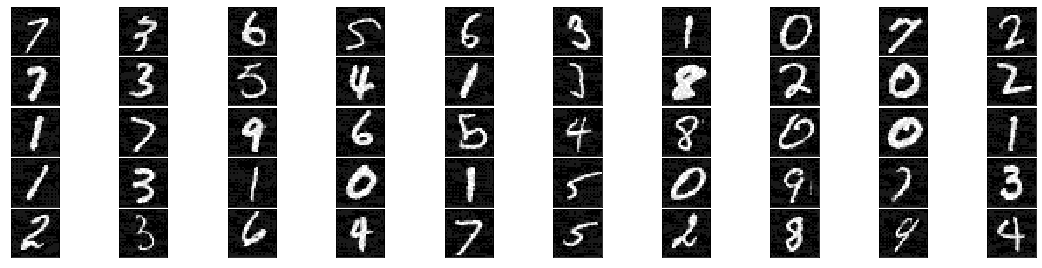

In [4]:
f_npz_image = save_restore_images.save_or_load_image__npz("load", 
r"C:\Users\sab\Downloads\AI Testing\Source\Dorefanet\tensorpack\FullPrecisionModels\logs\trained_images\FGSM\MNIST\MODEL_A_REGULARIZED\01\mnist-1,1,32\mnist_conv_adv_pre-1,1,32--run-0.npz")

f_images1 = f_npz_image.images

visualize_data.plot_images(f_images1)